# Data EDA (Exploratory Data Anaysis)

## 나눔 글꼴 설치

In [1]:
!apt-get -qq install fonts-nanum*

Selecting previously unselected package fonts-nanum.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


# 라이브러리 Import

In [17]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 한글 폰트 설정하기

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')  # 기본 폰트를 나눔고딕으로 설정

# Data Load

In [18]:
# 데이터 불러오기
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train.head(5)

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


# ID 컬럼 DROP

In [19]:
# 'ID' 컬럼 제거
train = train.drop(columns=['ID'])

# 컬럼명 확인

In [20]:
print(train.columns)

Index(['제조사', '모델', '차량상태', '배터리용량', '구동방식', '주행거리(km)', '보증기간(년)', '사고이력',
       '연식(년)', '가격(백만원)'],
      dtype='object')


# 각 컬럼의 요소의 종류와 수 확인

In [21]:
# 각 컬럼별 요소의 수 확인
value_counts = {col: train[col].value_counts() for col in train.columns}

# 결과 출력
for col, counts in value_counts.items():
    print(f"컬럼: {col}")
    print(counts)
    print()

컬럼: 제조사
제조사
H사    1237
B사    1169
K사    1164
A사    1142
T사    1109
P사    1071
V사     605
Name: count, dtype: int64

컬럼: 모델
모델
ID4       605
i5        414
Niro      398
Soul      397
i3        388
RSeTGT    385
eT        379
ION6      379
Q4eT      378
TayGTS    375
EV6       369
iX        367
KNE       365
Tay       361
ION5      353
TayCT     335
MY        289
M3        279
MS        277
MX        264
IONIQ     140
Name: count, dtype: int64

컬럼: 차량상태
차량상태
Brand New     3380
Nearly New    2059
Pre-Owned     2058
Name: count, dtype: int64

컬럼: 배터리용량
배터리용량
90.000    559
56.000    327
46.000    223
68.488    202
76.093    186
         ... 
86.680      1
68.470      1
72.000      1
68.920      1
65.210      1
Name: count, Length: 194, dtype: int64

컬럼: 구동방식
구동방식
AWD    5167
FWD    1267
RWD    1063
Name: count, dtype: int64

컬럼: 주행거리(km)
주행거리(km)
1631     4
3012     4
7233     4
978      4
7849     3
        ..
23978    1
48894    1
2725     1
8101     1
5416     1
Name: count, Length: 6916

# 가격과 다른 특징간의 관계 그래프 (Scatter)

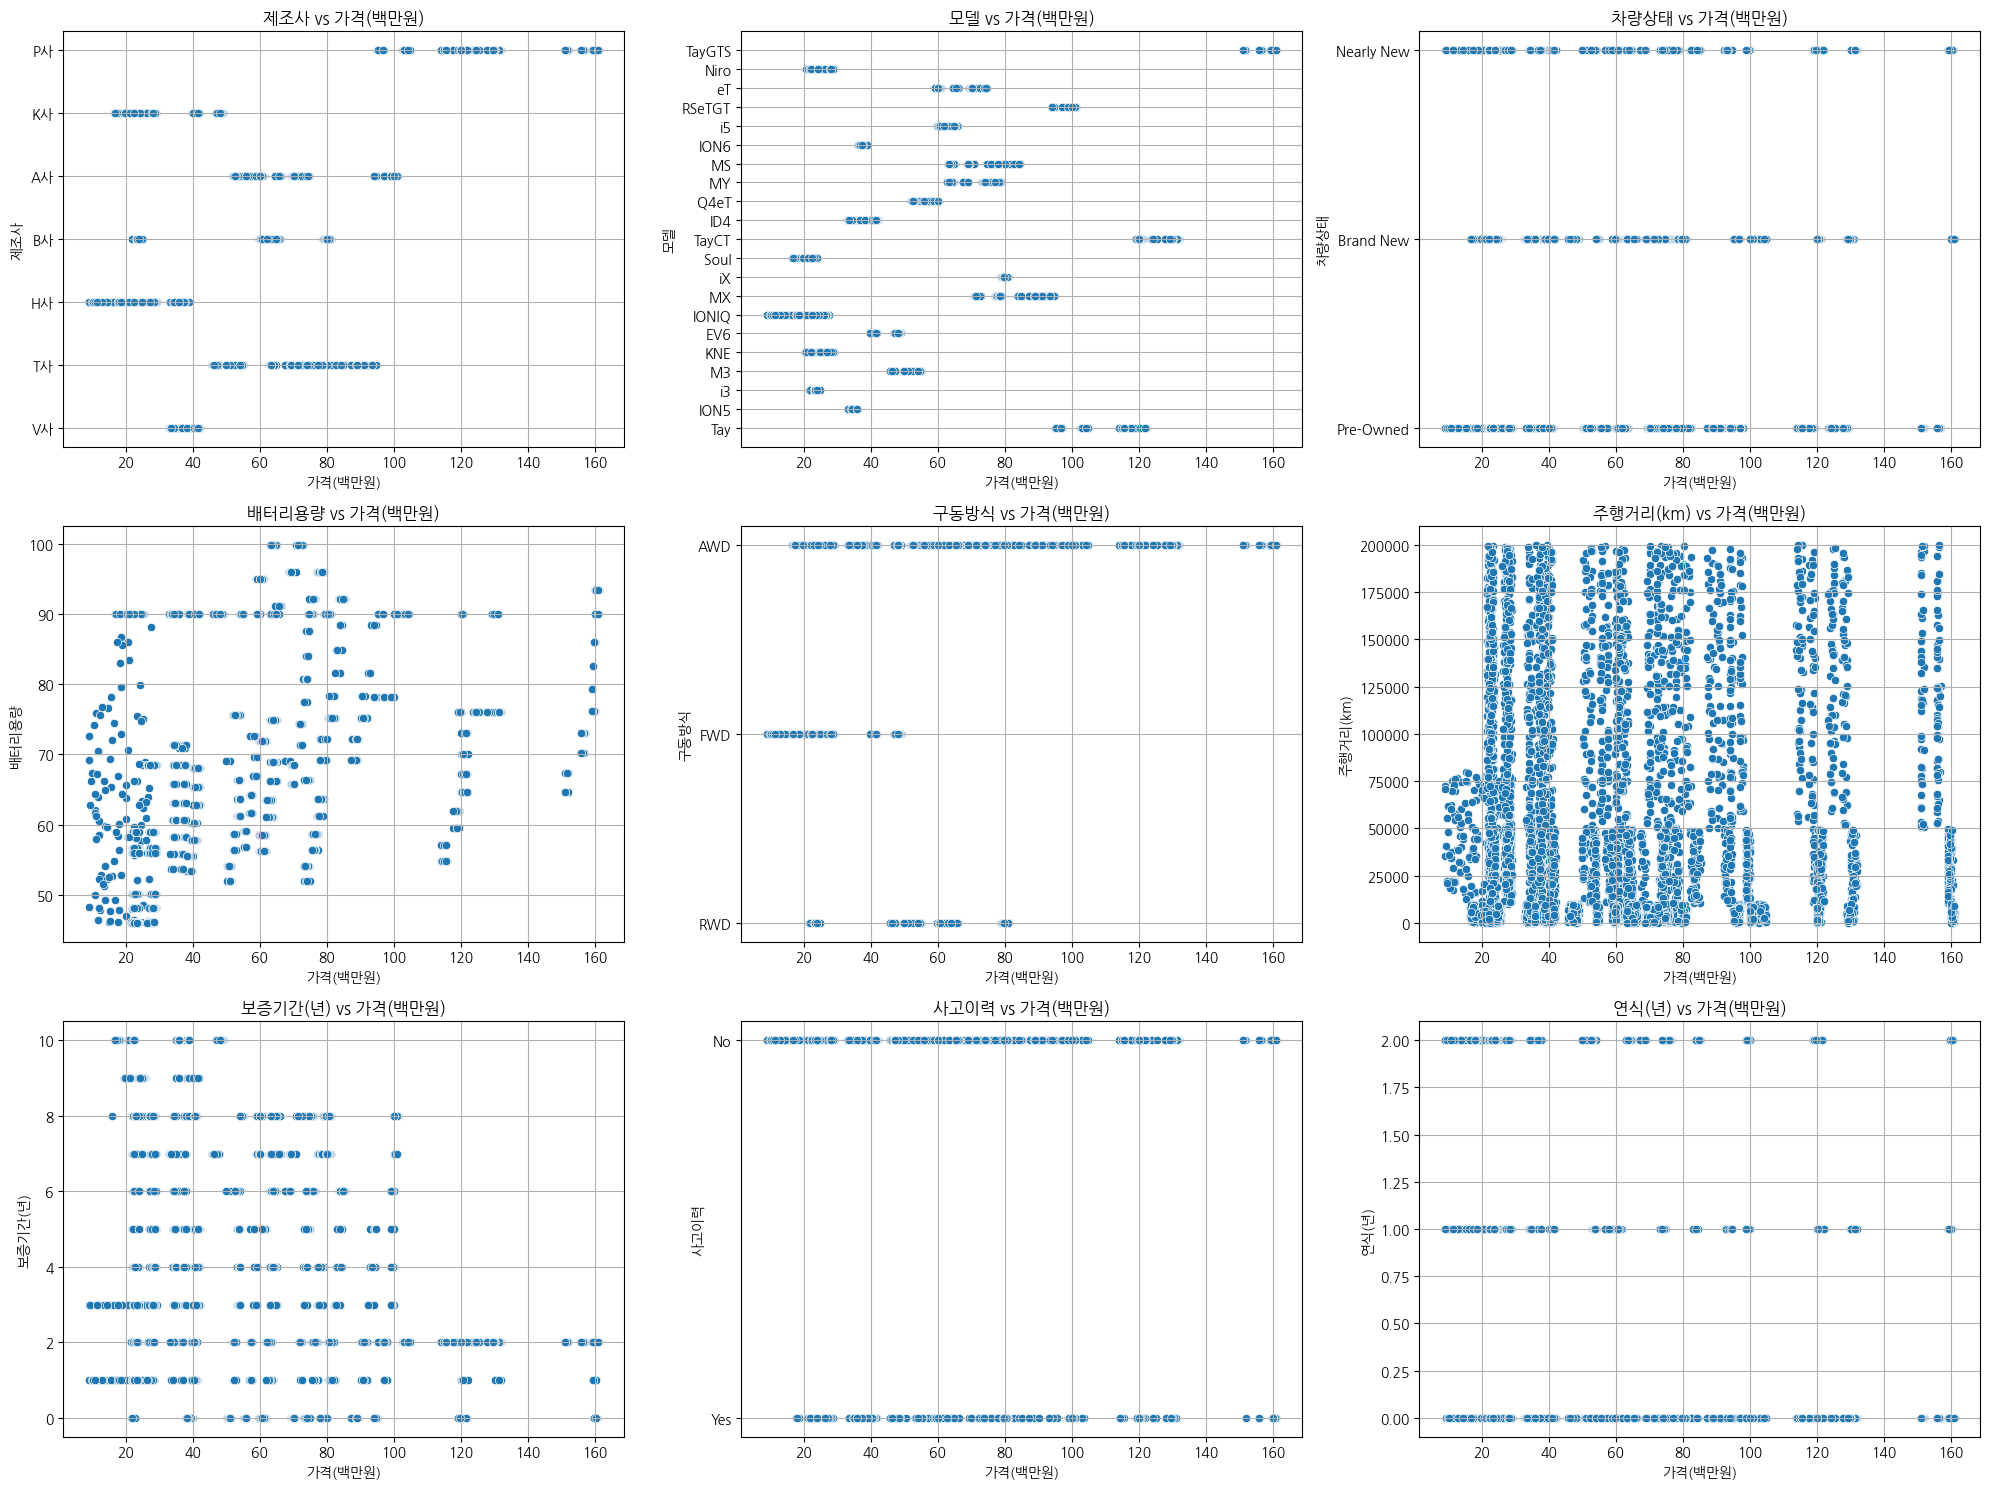

In [24]:
# 가격(백만원) 컬럼을 기준으로 산점도 그리기
plt.figure(figsize=(20, 15))  # 그래프 크기 증가

# 각 컬럼에 대해 산점도 그리기
for i, col in enumerate(train.columns):
    if col != '가격(백만원)':  # 가격 컬럼 제외
        plt.subplot(3, 3, i + 1)  # 3x3 그리드로 서브플롯 생성
        sns.scatterplot(x='가격(백만원)', y=col, data=train)
        plt.title(f"{col} vs 가격(백만원)")
        plt.xlabel("가격(백만원)")
        plt.ylabel(col)
        plt.grid()

plt.tight_layout()
plt.show()

# 차량상태에 따른 주행거리와 배터리용량 간의 관계 확인

1. Brand New : 0 ~ 10,000 km
2. Nearly New : 10,001 ~ 50,000km
3. Pre-Owned : 50,000km 초과

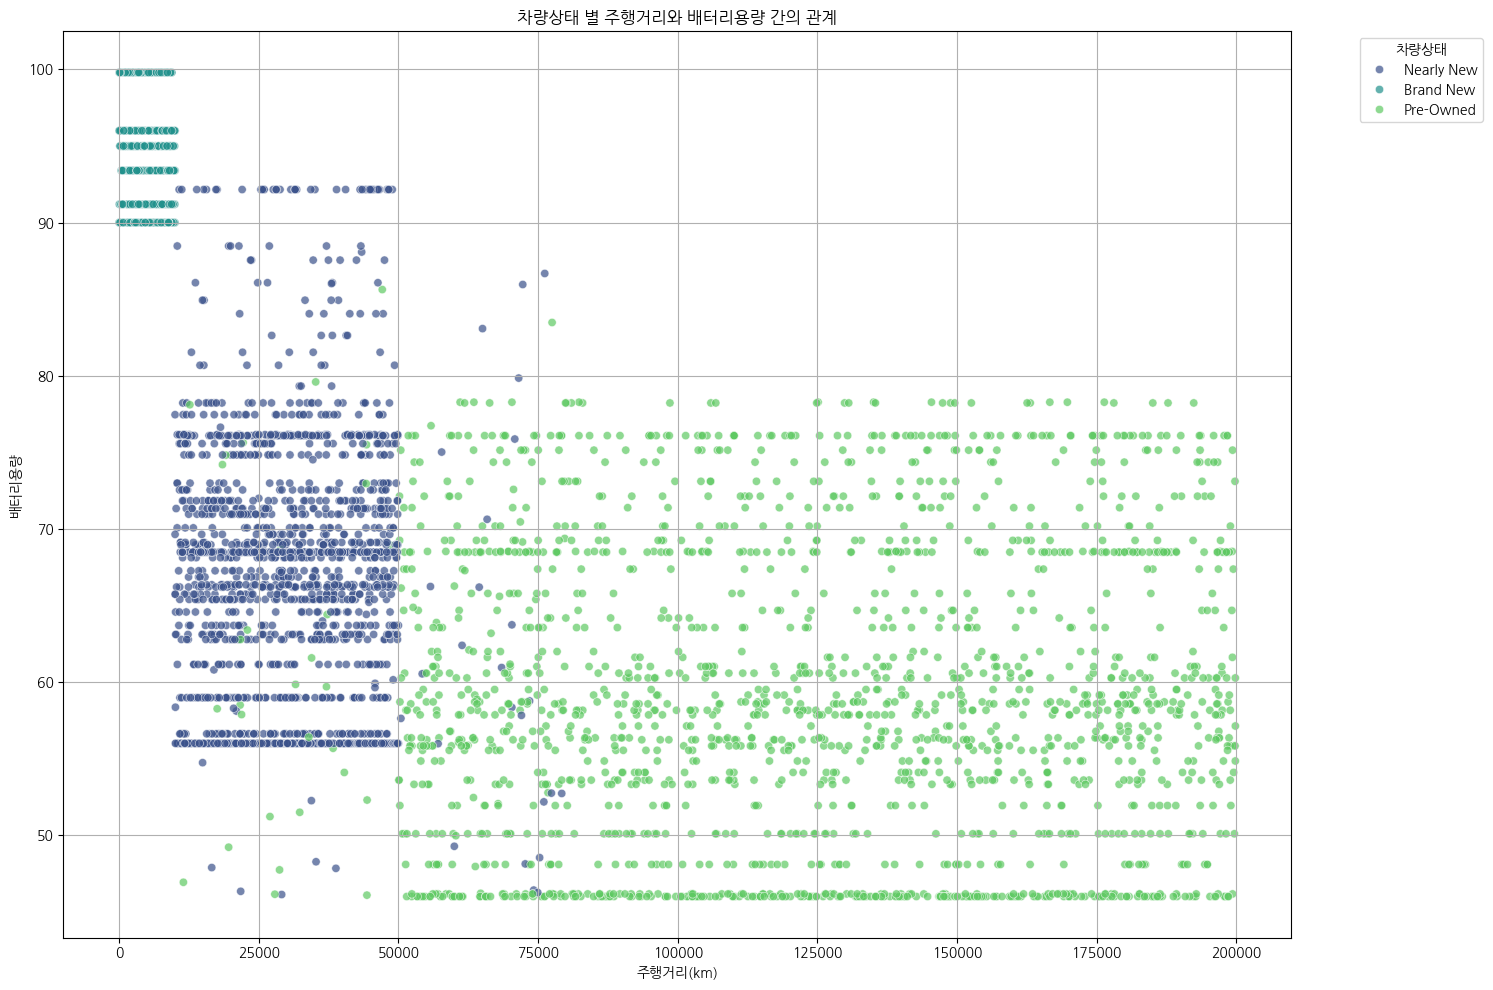

In [31]:
# 그래프 크기 설정
plt.figure(figsize=(15, 10))

# 모델 별 주행거리와 배터리 용량 간의 관계 시각화
sns.scatterplot(data=train, x='주행거리(km)', y='배터리용량', hue='차량상태', palette='viridis', alpha=0.7)

# 제목 및 축 레이블 추가
plt.title('차량상태 별 주행거리와 배터리용량 간의 관계')
plt.xlabel('주행거리(km)')
plt.ylabel('배터리용량')
plt.grid()

# 레전드를 그래프 외부로 이동
plt.legend(title='차량상태', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 출력
plt.tight_layout()  # 여백 조정
plt.show()

# 각 모델에 따른 주행거리(km)과 배터리용량간의 관계 확인

* 이상치 데이터 발견 : IONIQ 모델

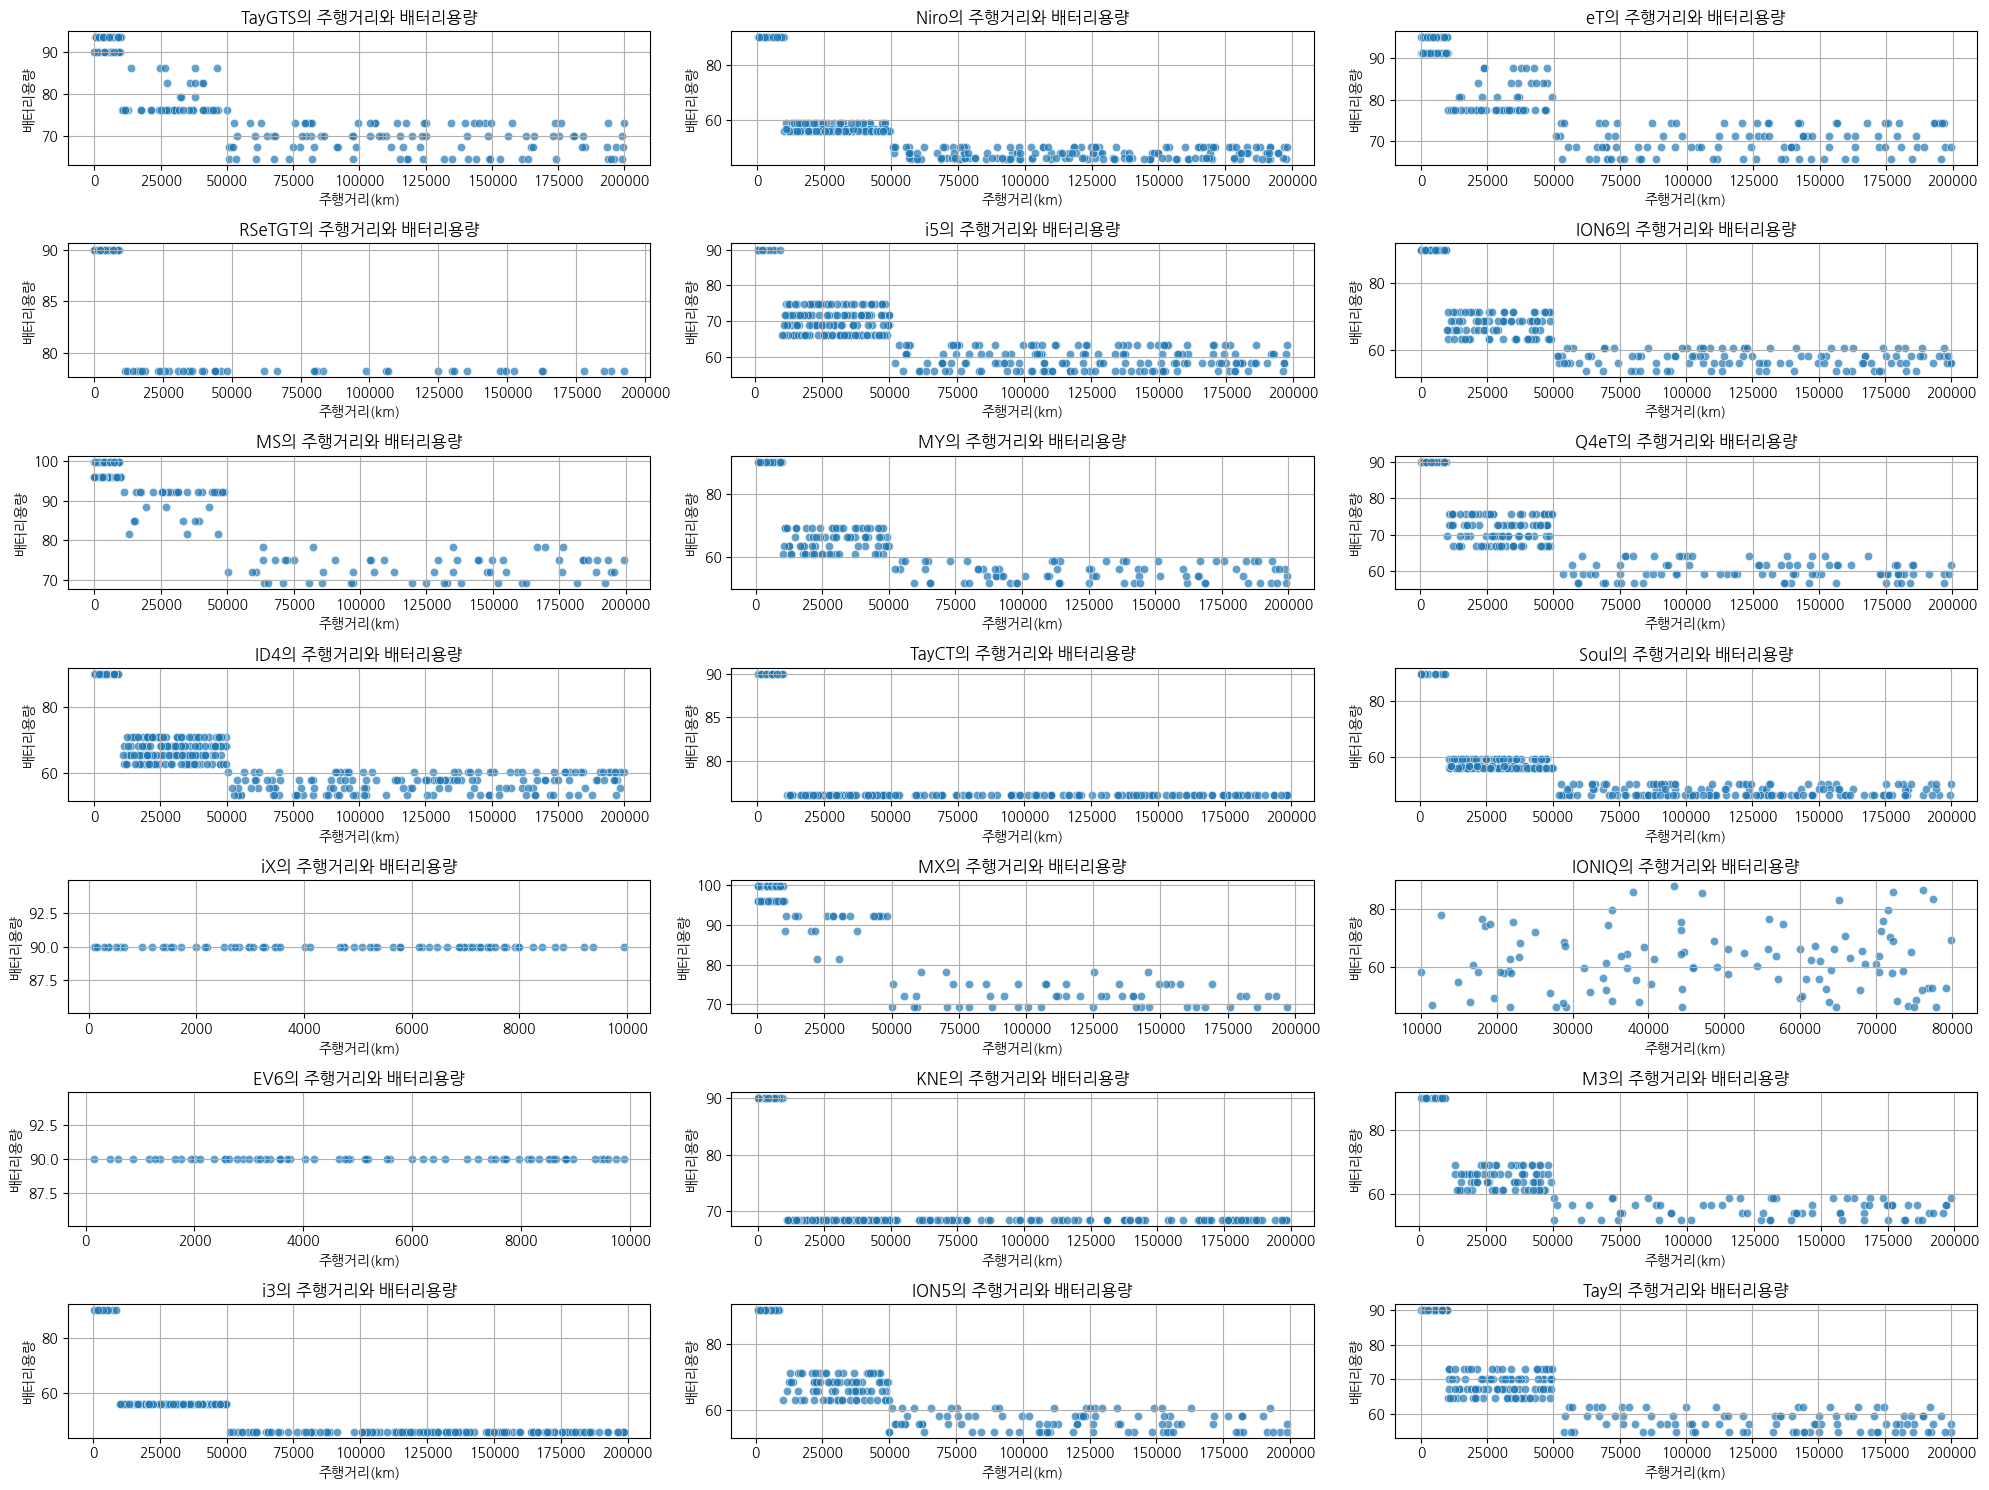

In [33]:
# 그래프 크기 설정
plt.figure(figsize=(20, 15))

# 모델 리스트 생성
models = train['모델'].unique()

# 서브플롯 행과 열 계산
n_models = len(models)
n_cols = 3  # 열 수
n_rows = (n_models // n_cols) + (n_models % n_cols > 0)  # 필요한 행 수 계산

# 각 모델에 대해 산점도 그리기
for i, model in enumerate(models):
    plt.subplot(n_rows, n_cols, i + 1)  # 서브플롯 생성
    model_data = train[train['모델'] == model]  # 모델별 데이터 필터링
    sns.scatterplot(data=model_data, x='주행거리(km)', y='배터리용량', alpha=0.7)
    plt.title(f"{model}의 주행거리와 배터리용량")
    plt.xlabel('주행거리(km)')
    plt.ylabel('배터리용량')
    plt.grid()

plt.tight_layout()
plt.show()

# IONIQ 모델 확인

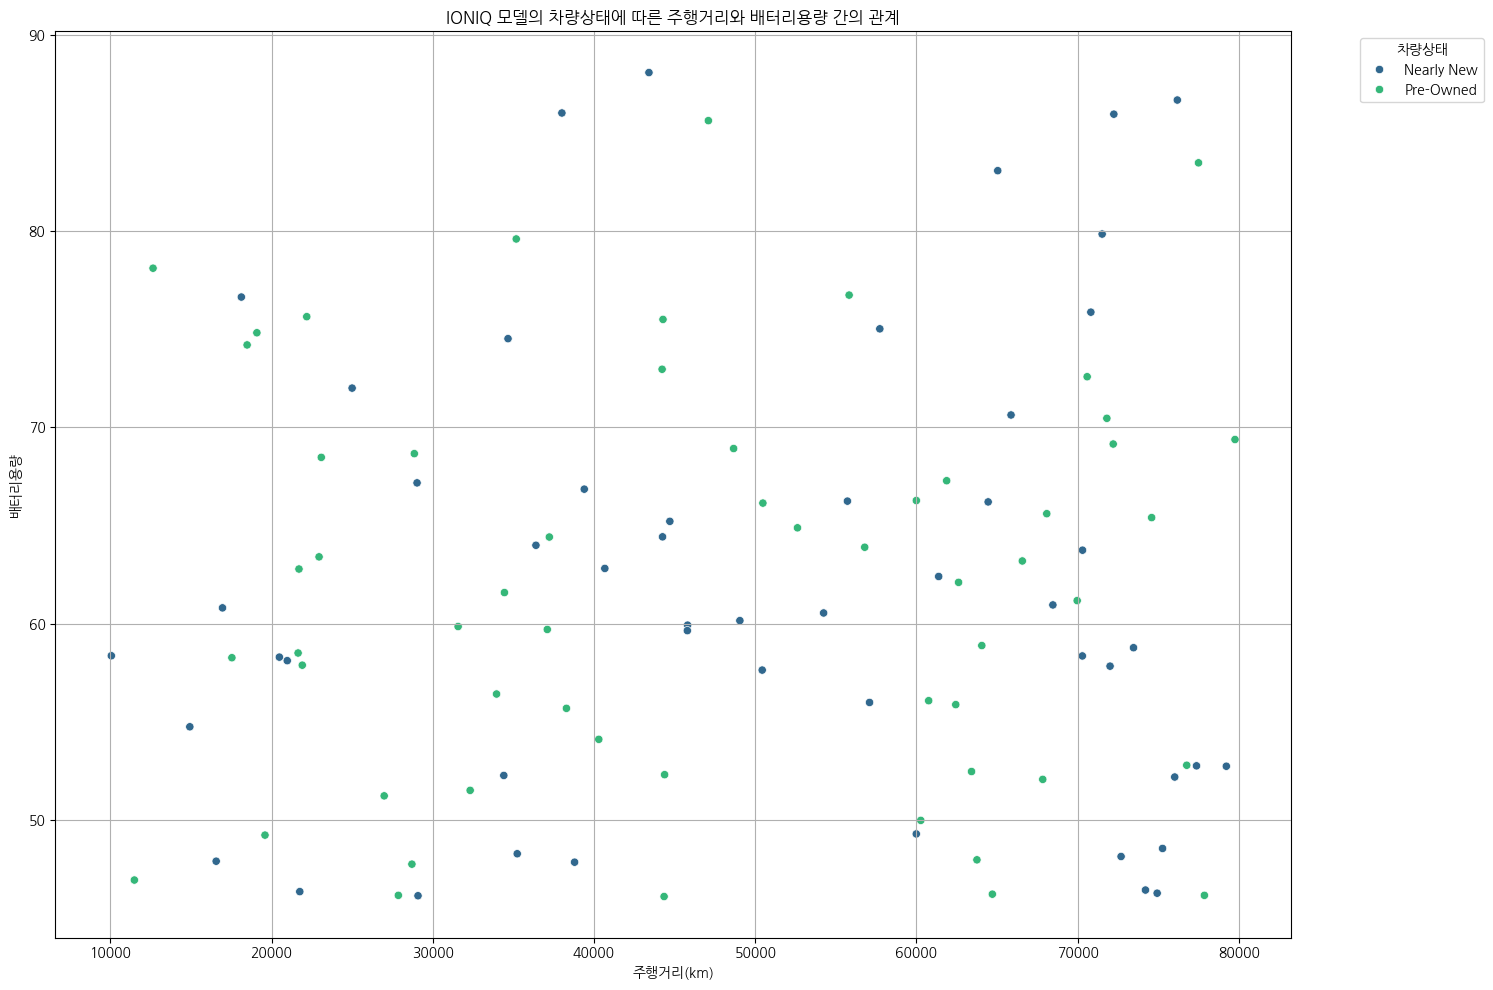

In [40]:
ioniq_data = train[train['모델'] == 'IONIQ']
# 그래프 크기 설정
plt.figure(figsize=(15, 10))

# 차량상태에 따른 주행거리와 배터리용량 간의 관계 시각화
sns.scatterplot(data=ioniq_data, x='주행거리(km)', y='배터리용량', hue='차량상태', palette='viridis', alpha=1)

# 제목 및 축 레이블 추가
plt.title('IONIQ 모델의 차량상태에 따른 주행거리와 배터리용량 간의 관계')
plt.xlabel('주행거리(km)')
plt.ylabel('배터리용량')
plt.legend(title='차량상태', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

# 그래프 출력
plt.tight_layout()
plt.show()

# IONIQ 모델의 보증기간(년)의 이상치

<ipython-input-68-f409e4d8a464>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='모델', y='보증기간(년)', palette='viridis')


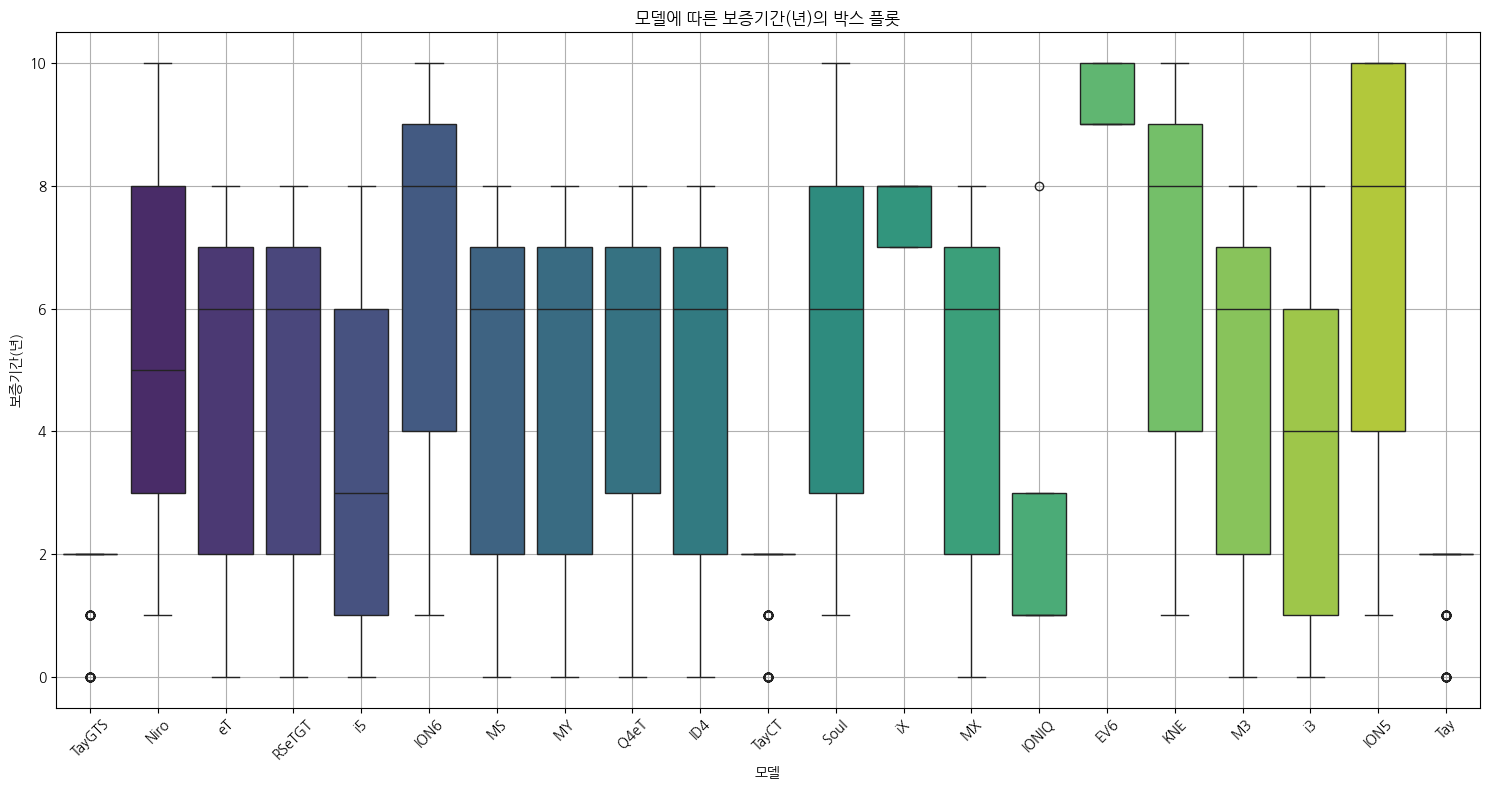

In [68]:

# 그래프 크기 설정
plt.figure(figsize=(15, 8))

# 각 모델에 따른 보증기간(년)의 박스 플롯 그리기
sns.boxplot(data=train, x='모델', y='보증기간(년)', palette='viridis')

# 제목 및 축 레이블 추가
plt.title('모델에 따른 보증기간(년)의 박스 플롯')
plt.xlabel('모델')
plt.ylabel('보증기간(년)')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid()

# 그래프 출력
plt.tight_layout()
plt.show()


# P사 모델 특징 확인

* Validation을 통해 IONIQ 모델 외에 P사의 모델들에 대한 성능이 좋지 않음을 확인 -> 데이터 분석

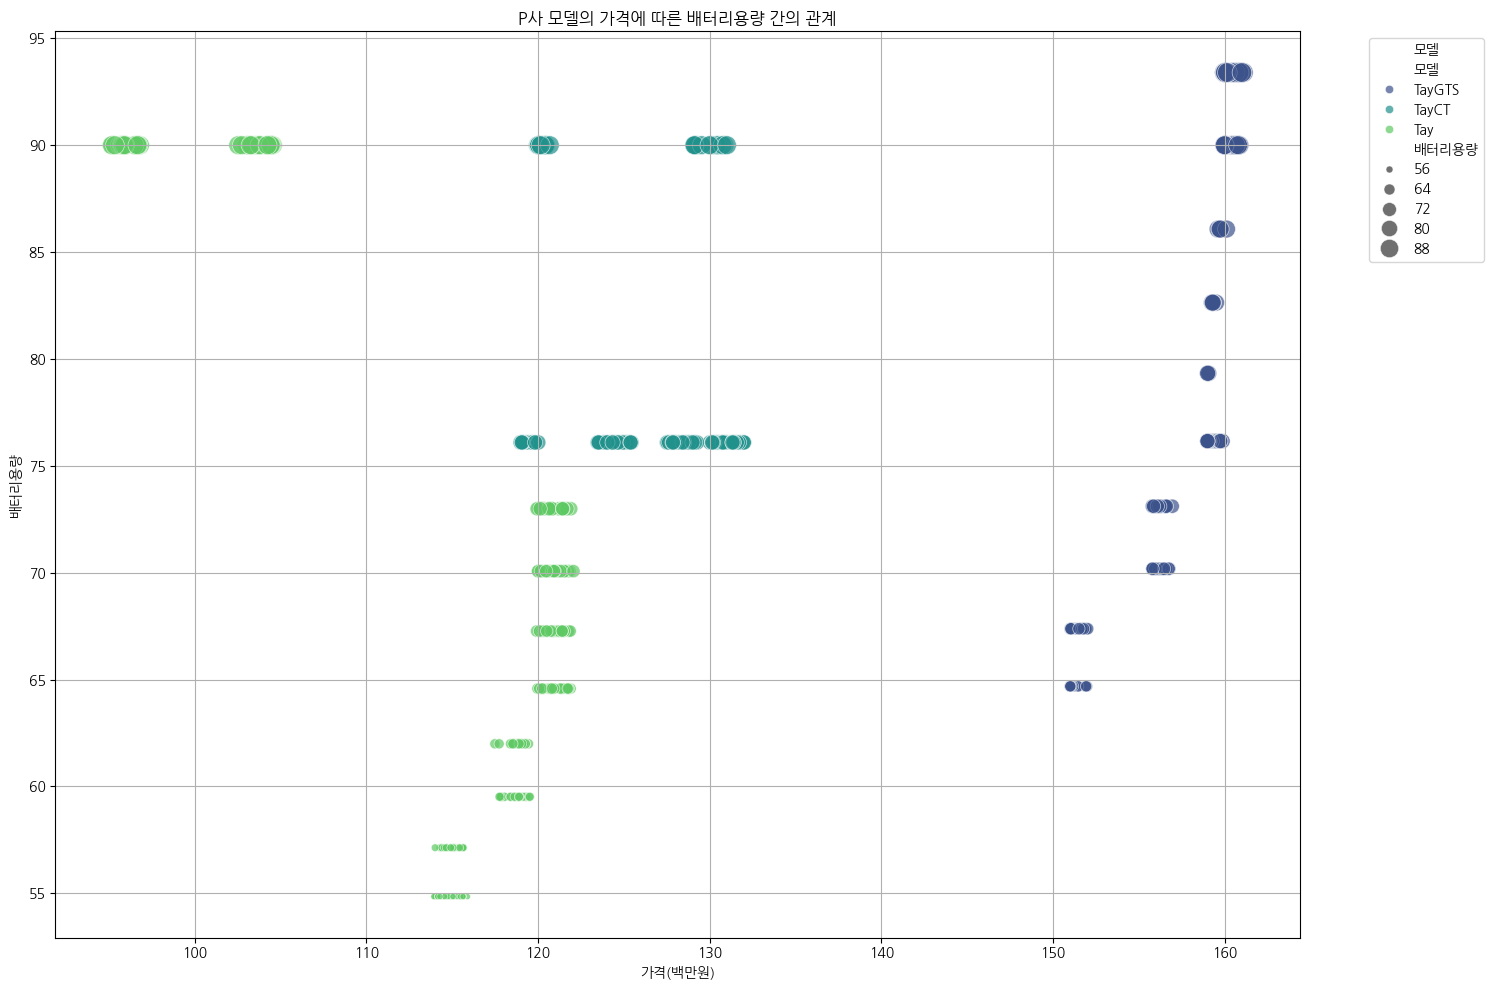

In [69]:
# 제조사가 P사인 데이터 필터링
p_data = train[train['제조사'] == 'P사']

# 그래프 크기 설정
plt.figure(figsize=(15, 10))

# 산점도: 가격에 따른 배터리용량 간의 관계 시각화
sns.scatterplot(data=p_data, x='가격(백만원)', y='배터리용량', hue='모델', size='배터리용량', sizes=(20, 200), alpha=0.7, palette='viridis')

# 제목 및 축 레이블 추가
plt.title('P사 모델의 가격에 따른 배터리용량 간의 관계')
plt.xlabel('가격(백만원)')
plt.ylabel('배터리용량')
plt.legend(title='모델', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

# 그래프 출력
plt.tight_layout()
plt.show()


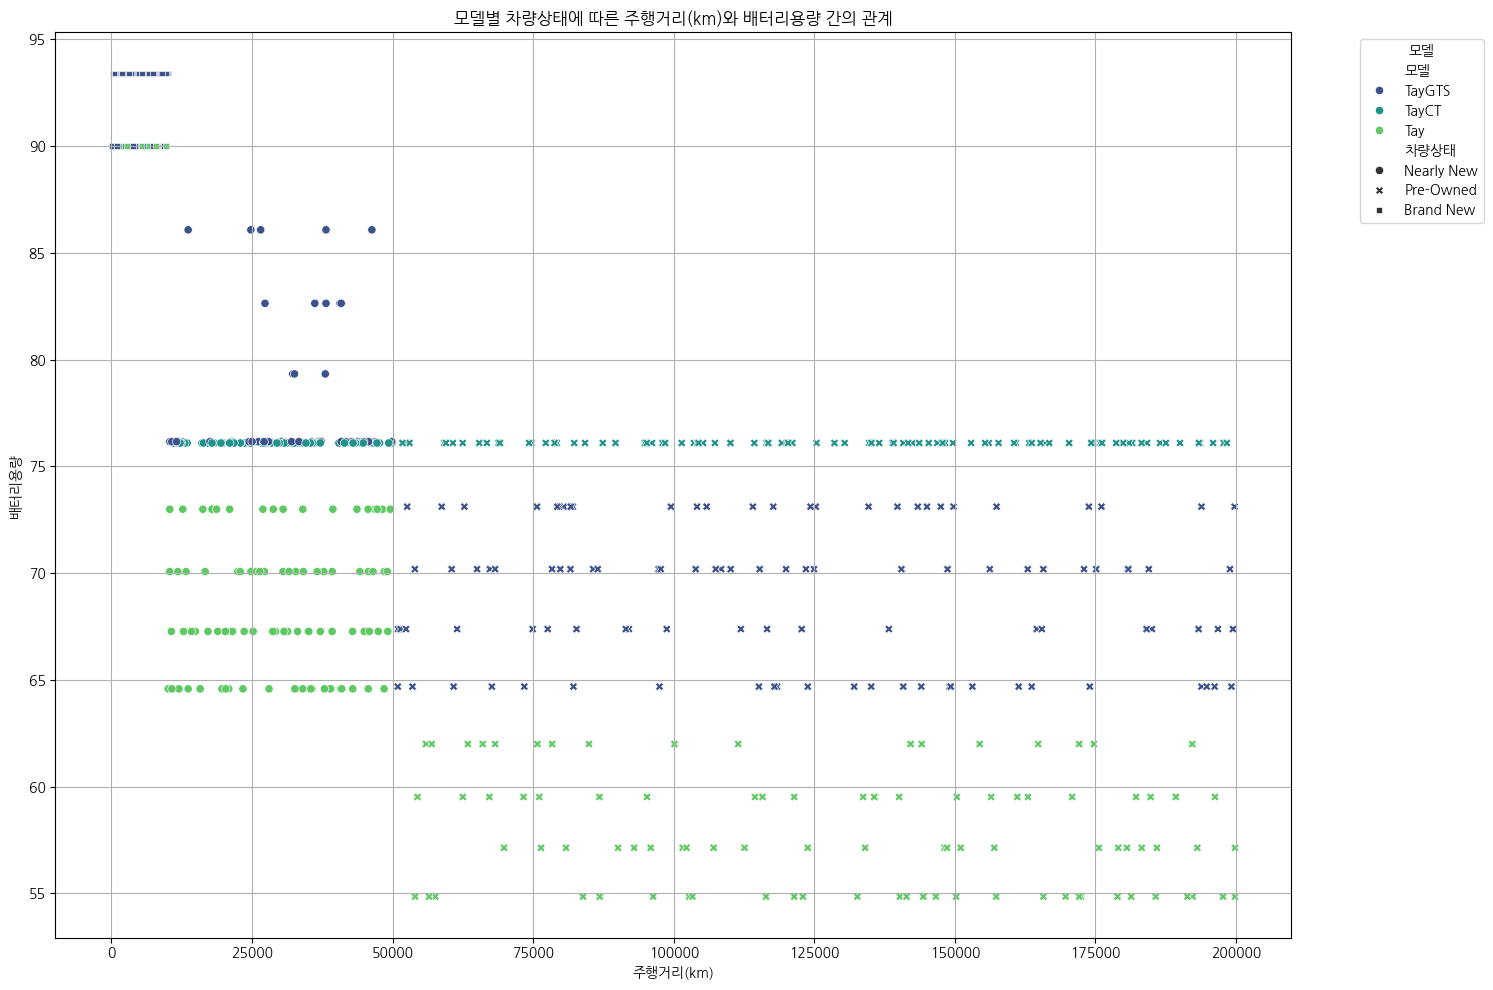

In [70]:

# 그래프 크기 설정
plt.figure(figsize=(15, 10))

# 모델별로 차량 상태에 따른 주행거리(km)와 배터리 용량 간의 관계 시각화
sns.scatterplot(data=p_data, x='주행거리(km)', y='배터리용량', hue='모델', style='차량상태', alpha=1, palette='viridis')

# 제목 및 축 레이블 추가
plt.title('모델별 차량상태에 따른 주행거리(km)와 배터리용량 간의 관계')
plt.xlabel('주행거리(km)')
plt.ylabel('배터리용량')
plt.legend(title='모델', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

# 그래프 출력
plt.tight_layout()
plt.show()
